In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN

In [ ]:
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8,2,10), return_sequences=True)) 

model.summary()

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import SimpleRNN
from keras.models import Sequential

tf.enable_eager_execution()

Using TensorFlow backend.


In [93]:
train_x = [[[0.1,4.2,1.5,1.1,2.8], [1.0,3.1,2.5,0.7,1.1], [0.3,2.1,1.5,2.1,0.1],[2.2,1.4,0.5,0.9,1.1]],
          [[0.1,4.2,1.5,1.1,2.8], [1.0,3.1,2.5,0.7,1.1], [0.3,2.1,1.5,2.1,0.1],[2.2,1.4,0.5,0.9,1.5]]]

train_x = np.array(train_x, dtype=np.float32)
print(train_x.shape)

(2, 4, 5)


In [94]:
rnn = SimpleRNN(3, return_sequences=False, return_state=True)  (40000, 28, 특성수)

hidden_states, last_states = rnn(train_x)

print(train_x, train_x.shape)
print(hidden_states, hidden_states.shape)
print(last_states, last_states.shape)

[[[0.1 4.2 1.5 1.1 2.8]
  [1.  3.1 2.5 0.7 1.1]
  [0.3 2.1 1.5 2.1 0.1]
  [2.2 1.4 0.5 0.9 1.1]]

 [[0.1 4.2 1.5 1.1 2.8]
  [1.  3.1 2.5 0.7 1.1]
  [0.3 2.1 1.5 2.1 0.1]
  [2.2 1.4 0.5 0.9 1.5]]] (2, 4, 5)
tf.Tensor(
[[ 0.27277473  0.7615665  -0.49227586]
 [ 0.35403258  0.858697   -0.5202573 ]], shape=(2, 3), dtype=float32) (2, 3)
tf.Tensor(
[[ 0.27277473  0.7615665  -0.49227586]
 [ 0.35403258  0.858697   -0.5202573 ]], shape=(2, 3), dtype=float32) (2, 3)


In [90]:
rnn = SimpleRNN(3, return_sequences=True, return_state=True)

hidden_states, last_states = rnn(train_x)

print(train_x, train_x.shape)
print(hidden_states, hidden_states.shape)
print(last_states, last_states.shape)

[[[0.1 4.2 1.5 1.1 2.8]
  [1.  3.1 2.5 0.7 1.1]
  [0.3 2.1 1.5 2.1 0.1]
  [2.2 1.4 0.5 0.9 1.1]]] (1, 4, 5)
tf.Tensor(
[[[-0.6241543   0.98460233  0.34768865]
  [ 0.15867776  0.807333    0.43210334]
  [ 0.9513882   0.94615567 -0.43344522]
  [-0.6608454  -0.54718184  0.14549981]]], shape=(1, 4, 3), dtype=float32) (1, 4, 3)
tf.Tensor([[-0.6608454  -0.54718184  0.14549981]], shape=(1, 3), dtype=float32) (1, 3)


In [92]:
rnn = SimpleRNN(3, return_sequences=True, return_state=False)

hidden_states, last_states = rnn(train_x)

print(train_x, train_x.shape)
print(hidden_states, hidden_states.shape)
print(last_states, last_states.shape)

ValueError: not enough values to unpack (expected 2, got 1)

In [4]:
text="나랑 점심 먹으러 갈래 메뉴는 햄버거 점심 메뉴 좋지"
from keras_preprocessing.text import Tokenizer
t = Tokenizer()
t.fit_on_texts([text])
encoded = t.texts_to_sequences([text])[0]
# [0]을 해주지 않으면 [[contents]]와 같은 리스트 안의 리스트 형태로 저장 됨.
# [0]을 해주면 [contents]와 같은 하나의 리스트로 저장됨.

In [5]:
vocab_size = len(t.word_index) + 1
# 케라스 토크나이저의 정수 인코딩은 인덱스가 1부터 시작하지만,
# 케라스 원-핫 인코딩에서 배열의 인덱스가 0부터 시작하기 때문에
# 배열의 크기를 실제 단어 집합의 크기보다 +1로 생성해야하므로 미리 +1 선언 
print('단어 집합의 크기 : %d' % vocab_size)

단어 집합의 크기 : 9


In [6]:
print(t.word_index)

{'점심': 1, '나랑': 2, '먹으러': 3, '갈래': 4, '메뉴는': 5, '햄버거': 6, '메뉴': 7, '좋지': 8}


In [7]:
sequences = list()
for c in range(1, len(encoded)):
    sequence = encoded[c-1:c+1] 
    # 단어를 두개씩 묶어서 저장해준다. 
    # 이는 X와 Y의 관계를 구성하기 위함이다.
    sequences.append(sequence)
print('단어 묶음의 개수: %d' % len(sequences))

단어 묶음의 개수: 8


In [8]:
print(sequences)

[[2, 1], [1, 3], [3, 4], [4, 5], [5, 6], [6, 1], [1, 7], [7, 8]]


In [9]:
import numpy as np
X, y = zip(*sequences) # 첫번째 열이 X, 두번째 열이 y가 됨.
X=np.array(X) # 타입을 배열로 변환
y=np.array(y) # 타입을 배열로 변환

In [10]:
from keras.utils import to_categorical
y = to_categorical(y, num_classes=vocab_size) # 원 핫 인코딩
print(y) # 0열은 다 0

[[0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [11]:
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN
from tensorflow.keras.models import Sequential
tf.compat.v1.disable_eager_execution()

model = Sequential()
model.add(Embedding(vocab_size, 9, input_length=1))
# 단어 집합의 크기는 9. 임베딩 벡터의 크기는 9. 각 sample의 길이는 단어 한 개이므로 길이는 1.
model.add(SimpleRNN(9))
# RNN의 결과값으로 나오는 벡터의 차원 또한 9로 한다. 더 크게 해주어도 상관은 없음.
model.add(Dense(vocab_size, activation='softmax'))
# 출력층을 지나서 나오는 벡터의 크기도 9로 한다.

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
model.compile(loss='categorical_crossentropy',optimizer='adam',
             metrics=['accuracy'])
model.fit(X, y, epochs=500, verbose=2)

Instructions for updating:
Use tf.cast instead.


C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\tensorflow\python\ops\gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/500
 - 0s - loss: 2.2087 - acc: 0.0000e+00
Epoch 2/500
 - 0s - loss: 2.2056 - acc: 0.0000e+00
Epoch 3/500
 - 0s - loss: 2.2026 - acc: 0.0000e+00
Epoch 4/500
 - 0s - loss: 2.1995 - acc: 0.0000e+00
Epoch 5/500
 - 0s - loss: 2.1965 - acc: 0.0000e+00
Epoch 6/500
 - 0s - loss: 2.1934 - acc: 0.0000e+00
Epoch 7/500
 - 0s - loss: 2.1904 - acc: 0.0000e+00
Epoch 8/500
 - 0s - loss: 2.1874 - acc: 0.0000e+00
Epoch 9/500
 - 0s - loss: 2.1843 - acc: 0.0000e+00
Epoch 10/500
 - 0s - loss: 2.1813 - acc: 0.0000e+00
Epoch 11/500
 - 0s - loss: 2.1782 - acc: 0.1250
Epoch 12/500
 - 0s - loss: 2.1752 - acc: 0.1250
Epoch 13/500
 - 0s - loss: 2.1721 - acc: 0.1250
Epoch 14/500
 - 0s - loss: 2.1690 - acc: 0.1250
Epoch 15/500
 - 0s - loss: 2.1659 - acc: 0.2500
Epoch 16/500
 - 0s - loss: 2.1628 - acc: 0.2500
Epoch 17/500
 - 0s - loss: 2.1597 - acc: 0.2500
Epoch 18/500
 - 0s - loss: 2.1566 - acc: 0.2500
Epoch 19/500
 - 0s - loss: 2.1534 - acc: 0.2500
Epoch 20/500
 - 0s - loss: 2.1502 - acc: 0.2500
Epoch 21/

Epoch 170/500
 - 0s - loss: 1.1269 - acc: 0.8750
Epoch 171/500
 - 0s - loss: 1.1191 - acc: 0.8750
Epoch 172/500
 - 0s - loss: 1.1114 - acc: 0.8750
Epoch 173/500
 - 0s - loss: 1.1037 - acc: 0.8750
Epoch 174/500
 - 0s - loss: 1.0960 - acc: 0.8750
Epoch 175/500
 - 0s - loss: 1.0884 - acc: 0.8750
Epoch 176/500
 - 0s - loss: 1.0809 - acc: 0.8750
Epoch 177/500
 - 0s - loss: 1.0733 - acc: 0.8750
Epoch 178/500
 - 0s - loss: 1.0658 - acc: 0.8750
Epoch 179/500
 - 0s - loss: 1.0584 - acc: 0.8750
Epoch 180/500
 - 0s - loss: 1.0510 - acc: 0.8750
Epoch 181/500
 - 0s - loss: 1.0437 - acc: 0.8750
Epoch 182/500
 - 0s - loss: 1.0364 - acc: 0.8750
Epoch 183/500
 - 0s - loss: 1.0291 - acc: 0.8750
Epoch 184/500
 - 0s - loss: 1.0219 - acc: 0.8750
Epoch 185/500
 - 0s - loss: 1.0147 - acc: 0.8750
Epoch 186/500
 - 0s - loss: 1.0076 - acc: 0.8750
Epoch 187/500
 - 0s - loss: 1.0006 - acc: 0.8750
Epoch 188/500
 - 0s - loss: 0.9935 - acc: 0.8750
Epoch 189/500
 - 0s - loss: 0.9866 - acc: 0.8750
Epoch 190/500
 - 0s 

Epoch 338/500
 - 0s - loss: 0.3911 - acc: 0.8750
Epoch 339/500
 - 0s - loss: 0.3892 - acc: 0.8750
Epoch 340/500
 - 0s - loss: 0.3872 - acc: 0.8750
Epoch 341/500
 - 0s - loss: 0.3853 - acc: 0.8750
Epoch 342/500
 - 0s - loss: 0.3835 - acc: 0.8750
Epoch 343/500
 - 0s - loss: 0.3816 - acc: 0.8750
Epoch 344/500
 - 0s - loss: 0.3798 - acc: 0.8750
Epoch 345/500
 - 0s - loss: 0.3780 - acc: 0.8750
Epoch 346/500
 - 0s - loss: 0.3762 - acc: 0.8750
Epoch 347/500
 - 0s - loss: 0.3744 - acc: 0.8750
Epoch 348/500
 - 0s - loss: 0.3726 - acc: 0.8750
Epoch 349/500
 - 0s - loss: 0.3709 - acc: 0.8750
Epoch 350/500
 - 0s - loss: 0.3692 - acc: 0.8750
Epoch 351/500
 - 0s - loss: 0.3675 - acc: 0.8750
Epoch 352/500
 - 0s - loss: 0.3658 - acc: 0.8750
Epoch 353/500
 - 0s - loss: 0.3641 - acc: 0.8750
Epoch 354/500
 - 0s - loss: 0.3625 - acc: 0.8750
Epoch 355/500
 - 0s - loss: 0.3608 - acc: 0.8750
Epoch 356/500
 - 0s - loss: 0.3592 - acc: 0.8750
Epoch 357/500
 - 0s - loss: 0.3576 - acc: 0.8750
Epoch 358/500
 - 0s 

In [13]:
print(t.word_index.items())

dict_items([('점심', 1), ('나랑', 2), ('먹으러', 3), ('갈래', 4), ('메뉴는', 5), ('햄버거', 6), ('메뉴', 7), ('좋지', 8)])


In [14]:
def predict_next_word(model, t, current_word):
    # 모델, 토크나이저, 현재 단어를 입력으로 받음
    
    encoded = t.texts_to_sequences([current_word])[0]
    # 현재 단어에 대한 정수 인코딩
    encoded = np.array(encoded)
    result = model.predict_classes(encoded, verbose=0)
    # 입력한 X(현대 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를
    # result에 저장
    print(result)
    for word, index in t.word_index.items():
    # 위에서 실습한 것처럼 단어와 인덱스를 리턴
        if index == result:
        # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
        
            return word

            # 그 단어를 출력
print(predict_next_word(model, t, '점심'))

[7]
메뉴


In [15]:
def sentence_generation(model, t, current_word, n):
    # 모델, 토크나이저, 현재 단어, 반복할 횟수
    init_word = current_word
    # 처음 들어온 단어도 마지막에 같이 출력하기 위해 저장해놓음
    sentence = ''
    for _ in range(n):
        encoded = t.texts_to_sequences([current_word])[0]
        # 현재 단어에 대한 정수 인코딩
        encoded = np.array(encoded)
        # 현재 단어에 대한 정수 인코딩
        result = model.predict_classes(encoded, verbose=0)
        # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를
        # result에 저장
        for word, index in t.word_index.items():
            if index == result:
            # 만약 예측한 단어와 인덱스가 동일한 단어가 있다면
                break
            # 해당 단어가 예측 단어이므로 break
        current_word = word
        # 예측 단어를 현재 단어로 변경
        sentence = sentence + ' '+ word
        # 예측 단어를 문장에 저장
    # 전체 반복
    sentence = init_word + sentence
    return sentence
print(sentence_generation(model, t, '먹으러', 6))

먹으러 갈래 메뉴는 햄버거 점심 메뉴 좋지


# 두번째 실습

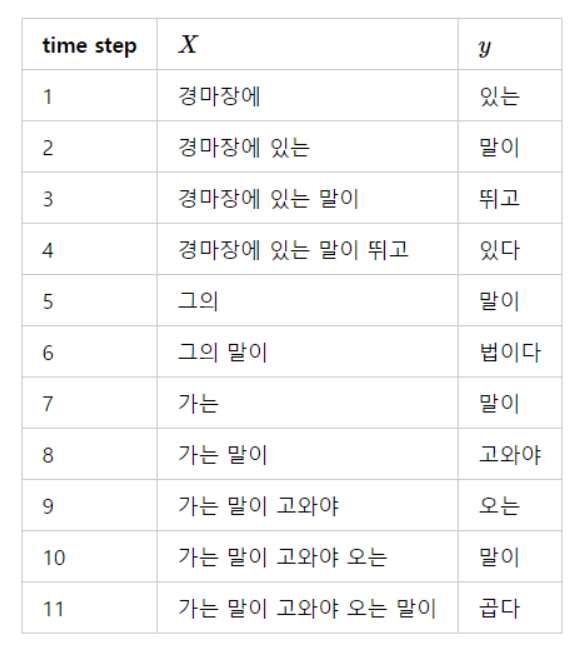

In [41]:
text = """경마장에 있는 말이 뛰고 있다\n
그의 말이 법이다\n
가는 말이 고와야 오는 말이 곱다\n"""

In [42]:
from keras_preprocessing.text import Tokenizer
t = Tokenizer()
t.fit_on_texts([text])
encoded = t.texts_to_sequences([text])[0]

In [43]:
vocab_size = len(t.word_index)+1
# 케라스 토크나이저의 정수 인코딩은 인덱스가 1부터 시작하지만,
# 케라스 원-핫 인코딩에서 배열의 인덱스가 0부터 시작하기 때문에
# 배열의 크기를 실제 단어 집합의 크기보다 +1로 생성해야하므로 미리 +1 선언
print('단어 집합의 크기: %d' % vocab_size)

단어 집합의 크기: 12


In [46]:
print(t.word_index)

{'말이': 1, '경마장에': 2, '있는': 3, '뛰고': 4, '있다': 5, '그의': 6, '법이다': 7, '가는': 8, '고와야': 9, '오는': 10, '곱다': 11}


In [48]:
sequences = list()
for line in text.split('\n'): # \n 기준으로 문장 토큰화
    encoded = t.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)
print('훈련 데이터의 개수: %d' % len(sequences))

훈련 데이터의 개수: 11


In [49]:
print(sequences)

[[2, 3], [2, 3, 1], [2, 3, 1, 4], [2, 3, 1, 4, 5], [6, 1], [6, 1, 7], [8, 1], [8, 1, 9], [8, 1, 9, 10], [8, 1, 9, 10, 1], [8, 1, 9, 10, 1, 11]]


In [50]:
print(max(len(l) for l in sequences))
# 모든 데이터에서 길이가 가장 긴 데이터의 길이 출력

6


In [51]:
from keras.preprocessing.sequence import pad_sequences
sequences = pad_sequences(sequences, maxlen=6, padding='pre')

print(sequences)

[[ 0  0  0  0  2  3]
 [ 0  0  0  2  3  1]
 [ 0  0  2  3  1  4]
 [ 0  2  3  1  4  5]
 [ 0  0  0  0  6  1]
 [ 0  0  0  6  1  7]
 [ 0  0  0  0  8  1]
 [ 0  0  0  8  1  9]
 [ 0  0  8  1  9 10]
 [ 0  8  1  9 10  1]
 [ 8  1  9 10  1 11]]


In [52]:
import numpy as np
sequences = np.array(sequences)
X = sequences[:, :-1]
y = sequences[:, -1]
# 리스트의 마지막 열을 제외하고 저장한 것은 X
# 리스트의 마지막 열만 저장한 것은 y

In [53]:
print(X)

[[ 0  0  0  0  2]
 [ 0  0  0  2  3]
 [ 0  0  2  3  1]
 [ 0  2  3  1  4]
 [ 0  0  0  0  6]
 [ 0  0  0  6  1]
 [ 0  0  0  0  8]
 [ 0  0  0  8  1]
 [ 0  0  8  1  9]
 [ 0  8  1  9 10]
 [ 8  1  9 10  1]]


In [54]:
print(y)

[ 3  1  4  5  1  7  1  9 10  1 11]


In [55]:
from keras.utils import to_categorical
y = to_categorical(y, num_classes=vocab_size)
# y에 대한 원-핫 인코딩 수행

In [56]:
print(y)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [58]:
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=5))
# y를 제거하였으므로 이제 x의 길이는 5
model.add(SimpleRNN(32))
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=2)

Epoch 1/200
 - 0s - loss: 2.4974 - acc: 0.0000e+00
Epoch 2/200
 - 0s - loss: 2.4839 - acc: 0.0909
Epoch 3/200
 - 0s - loss: 2.4706 - acc: 0.0909
Epoch 4/200
 - 0s - loss: 2.4573 - acc: 0.0909
Epoch 5/200
 - 0s - loss: 2.4441 - acc: 0.0909
Epoch 6/200
 - 0s - loss: 2.4307 - acc: 0.1818
Epoch 7/200
 - 0s - loss: 2.4172 - acc: 0.2727
Epoch 8/200
 - 0s - loss: 2.4033 - acc: 0.3636
Epoch 9/200
 - 0s - loss: 2.3891 - acc: 0.4545
Epoch 10/200
 - 0s - loss: 2.3744 - acc: 0.4545
Epoch 11/200
 - 0s - loss: 2.3593 - acc: 0.5455
Epoch 12/200
 - 0s - loss: 2.3435 - acc: 0.5455
Epoch 13/200
 - 0s - loss: 2.3270 - acc: 0.5455
Epoch 14/200
 - 0s - loss: 2.3098 - acc: 0.4545
Epoch 15/200
 - 0s - loss: 2.2918 - acc: 0.3636
Epoch 16/200
 - 0s - loss: 2.2729 - acc: 0.3636
Epoch 17/200
 - 0s - loss: 2.2532 - acc: 0.3636
Epoch 18/200
 - 0s - loss: 2.2325 - acc: 0.3636
Epoch 19/200
 - 0s - loss: 2.2109 - acc: 0.3636
Epoch 20/200
 - 0s - loss: 2.1884 - acc: 0.3636
Epoch 21/200
 - 0s - loss: 2.1649 - acc: 0.36

Epoch 171/200
 - 0s - loss: 0.1297 - acc: 1.0000
Epoch 172/200
 - 0s - loss: 0.1270 - acc: 1.0000
Epoch 173/200
 - 0s - loss: 0.1244 - acc: 1.0000
Epoch 174/200
 - 0s - loss: 0.1218 - acc: 1.0000
Epoch 175/200
 - 0s - loss: 0.1194 - acc: 1.0000
Epoch 176/200
 - 0s - loss: 0.1169 - acc: 1.0000
Epoch 177/200
 - 0s - loss: 0.1146 - acc: 1.0000
Epoch 178/200
 - 0s - loss: 0.1123 - acc: 1.0000
Epoch 179/200
 - 0s - loss: 0.1101 - acc: 1.0000
Epoch 180/200
 - 0s - loss: 0.1079 - acc: 1.0000
Epoch 181/200
 - 0s - loss: 0.1058 - acc: 1.0000
Epoch 182/200
 - 0s - loss: 0.1038 - acc: 1.0000
Epoch 183/200
 - 0s - loss: 0.1018 - acc: 1.0000
Epoch 184/200
 - 0s - loss: 0.0998 - acc: 1.0000
Epoch 185/200
 - 0s - loss: 0.0980 - acc: 1.0000
Epoch 186/200
 - 0s - loss: 0.0961 - acc: 1.0000
Epoch 187/200
 - 0s - loss: 0.0943 - acc: 1.0000
Epoch 188/200
 - 0s - loss: 0.0926 - acc: 1.0000
Epoch 189/200
 - 0s - loss: 0.0909 - acc: 1.0000
Epoch 190/200
 - 0s - loss: 0.0892 - acc: 1.0000
Epoch 191/200
 - 0s 

In [75]:
def sentence_generation(model, t, current_word, n):
    # 모델, 토크나이저, 현재 단어, 반복 횟수
    init_word= current_word
    # 처음 들어온 단어도 마지막에 출력하기 위해 저장
    sentence = ''
    for _ in range(n):
        encoded = t.texts_to_sequences([current_word])[0]
        # 현재 단어에 대한 정수 인코딩
        encoded = pad_sequences([encoded], maxlen=5, padding='pre')
        # 데이터에 대한 패딩
        result = model.predict_classes(encoded, verbose=0)
        # 입력한 X(현재 단어)에 대해서 Y를 입력하고
        # Y(예측한 단어)를 result에 저장.
        for word, index in t.word_index.items():
            if index == result:
                break
        current_word = current_word + ' ' + word
        # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        sentence = sentence + ' ' + word
    # 전체 반복
    sentence = init_word + sentence
    return sentence

In [76]:
print(sentence_generation(model, t, '경마장에', 4))

경마장에 있는 말이 뛰고 있다


In [77]:
print(sentence_generation(model, t, '그의', 2))

그의 말이 법이다


In [78]:
print(sentence_generation(model, t, '가는', 5))

가는 말이 고와야 오는 말이 곱다
